Flask is a web framework for Python, meaning that it provides functionality for building web applications, including managing HTTP requests and rendering templates. Flask maps HTTP requests to Python functions.

In [1]:
 import flask

app = flask.Flask(__name__)

@app.route('/', methods=['GET'])
def home():
    return "<h1>Distant Reading Archive</h1><p>This site is a prototype API for distant reading of science fiction novels.</p>"

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [20/Aug/2025 11:19:55] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [20/Aug/2025 11:19:55] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [20/Aug/2025 11:21:35] "GET / HTTP/1.1" 200 -



op:
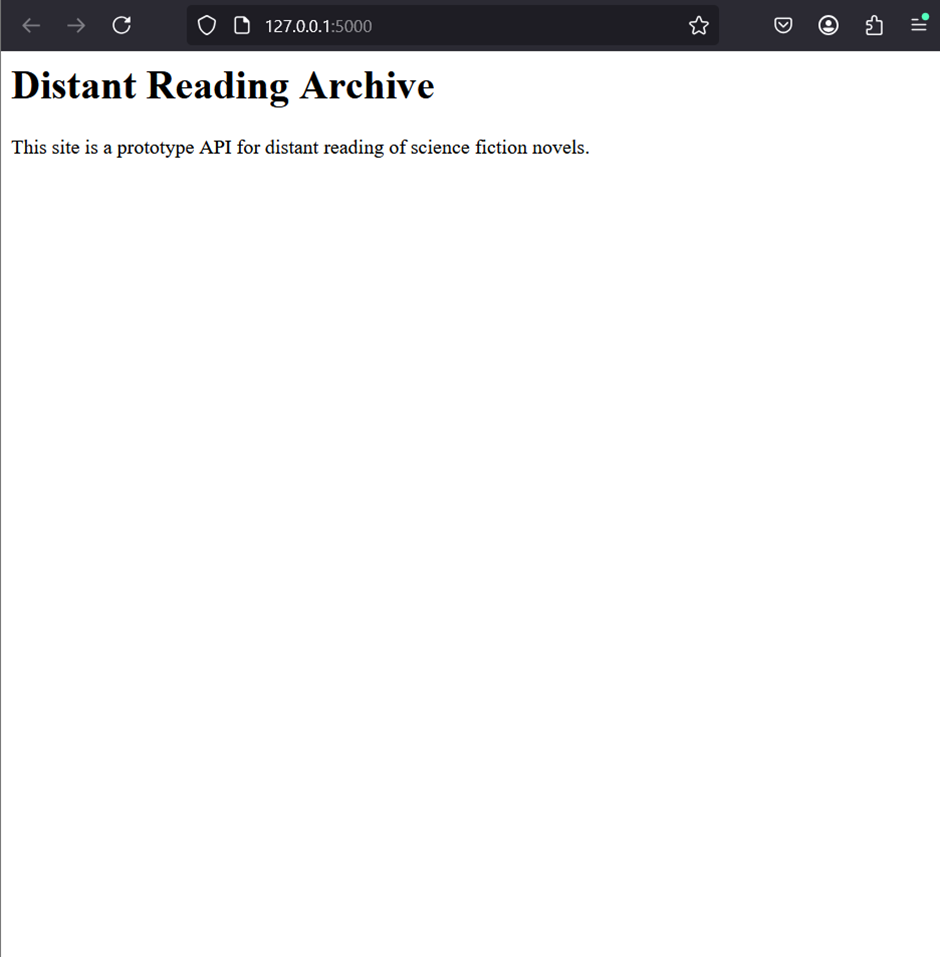

In this case, we’ve mapped one URL path (‘/’) to one function, home. When we connect to the Flask server at http://127.0.0.1:5000/, Flask checks if there is a match between the path provided and a defined function. Since /, or no additional provided path, has been mapped to the home function, Flask runs the code in the function and displays the returned result in the browser.

In this case, the returned result is HTML markup for a home page welcoming visitors to the site hosting our API.

The process of mapping URLs to functions is called routing.


**@app.route('/', methods=['GET'])**


syntax is the part of the program that lets Flask know that this function, home, should be mapped to the path /. The methods list (methods=[‘GET’]) is a keyword argument that lets Flask know what kind of HTTP requests are allowed.

Below are brief explanations of the other components of the application:

import flask — Imports the Flask library, making the code available to the rest of the application.

app = flask.Flask(name) — Creates the Flask application object, which contains data about the application and also methods (object functions) that tell the application to do certain actions. The last line, app.run(), is one such method.

app.config[“DEBUG”] = True — Starts the debugger. With this line, if your code is malformed, you’ll see an error when you visit your app. Otherwise you’ll only see a generic message such as Bad Gateway in the browser when there’s a problem with your code.

app.run() — A method that runs the application server.

In [ ]:
import flask
#using request to read query parameters from the URL and jsonify to return JSON.
from flask import request, jsonify

#Creating the app.It makes the Flask application object.
app = flask.Flask(__name__)

#Creating some test data for our catalog in the form of a list of dictionaries. Each dictionary is one book.
books = [
    {'id': 0,
     'title': 'A Fire Upon the Deep',
     'author': 'Vernor Vinge',
     'first_sentence': 'The coldsleep itself was dreamless.',
     'year_published': '1992'},
    {'id': 1,
     'title': 'The Ones Who Walk Away From Omelas',
     'author': 'Ursula K. Le Guin',
     'first_sentence': 'With a clamor of bells that set the swallows soaring, the Festival of Summer came to the city Omelas, bright-towered by the sea.',
     'published': '1973'},
    {'id': 2,
     'title': 'Dhalgren',
     'author': 'Samuel R. Delany',
     'first_sentence': 'to wound the autumnal city.',
     'published': '1975'}
]

#visiting /, Flask returns a simple HTML page.
@app.route('/', methods=['GET'])
def home():
    return '''<h1>Distant Reading Archive</h1>
<p>A prototype API for distant reading of science fiction novels.</p>'''

#visiting /books/all, we get all the book data as JSON.
@app.route('/books/all', methods=['GET'])
def api_all():
    return jsonify(books)

@app.route('/books', methods=['GET'])
def api_id():
    # Check if an ID was provided as part of the URL.
    # If ID is provided, assign it to a variable.
    # It expects a URL like /books?id=1.
    # It reads the id parameter from the query string, converts it to an integer, loops over the books, and returns a list containing the matching book (or an empty list if none match).
    if 'id' in request.args:
        id = int(request.args['id'])
    else:
        return "Error: No id field provided. Please specify an id."

    # Create an empty list for our results
    results = []

    # Loop through the data and match results that fit the requested ID.
    # IDs are unique, but other fields might return many results
    for book in books:
        if book['id'] == id:
            results.append(book)

    # Use the jsonify function from Flask to convert our list of
    # Python dictionaries to the JSON format.
    return jsonify(results)

#Launches Flask’s built-in development server on http://127.0.0.1:5000/ by default.
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [20/Aug/2025 13:32:11] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [20/Aug/2025 13:33:17] "GET /books/all HTTP/1.1" 200 -
127.0.0.1 - - [20/Aug/2025 13:33:17] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [20/Aug/2025 13:34:08] "GET /books?id=0 HTTP/1.1" 200 -
127.0.0.1 - - [20/Aug/2025 13:34:08] "GET /favicon.ico HTTP/1.1" 404 -


How to try it

Home: http://127.0.0.1:5000/
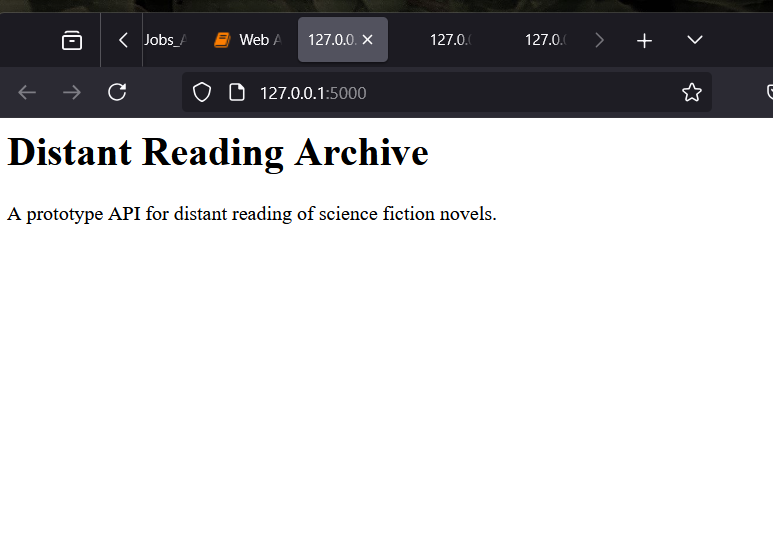
All books: http://127.0.0.1:5000/books/all
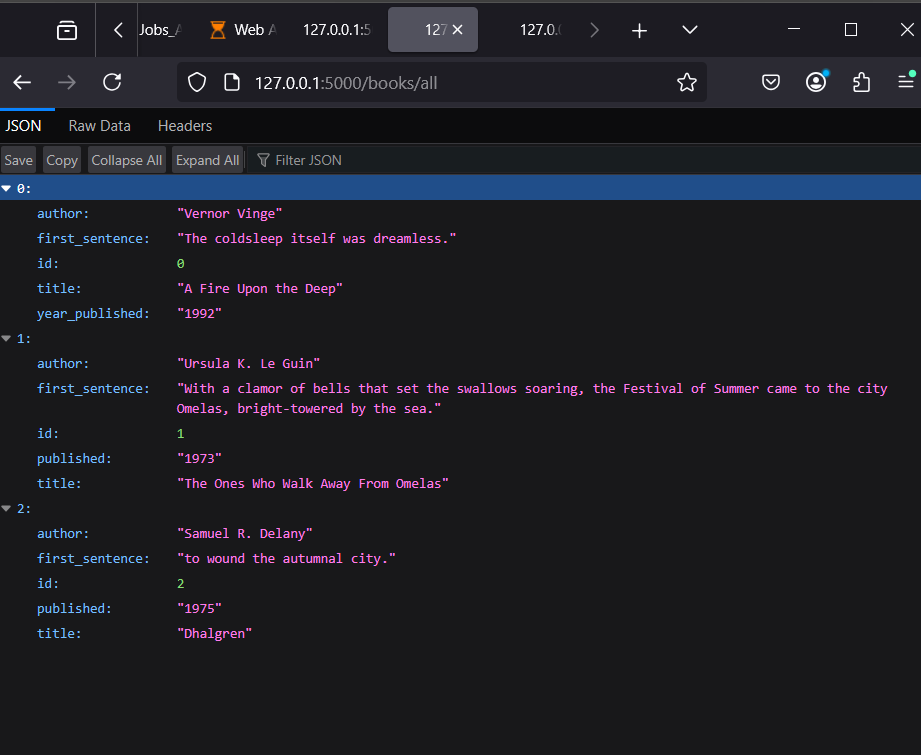
Headears:
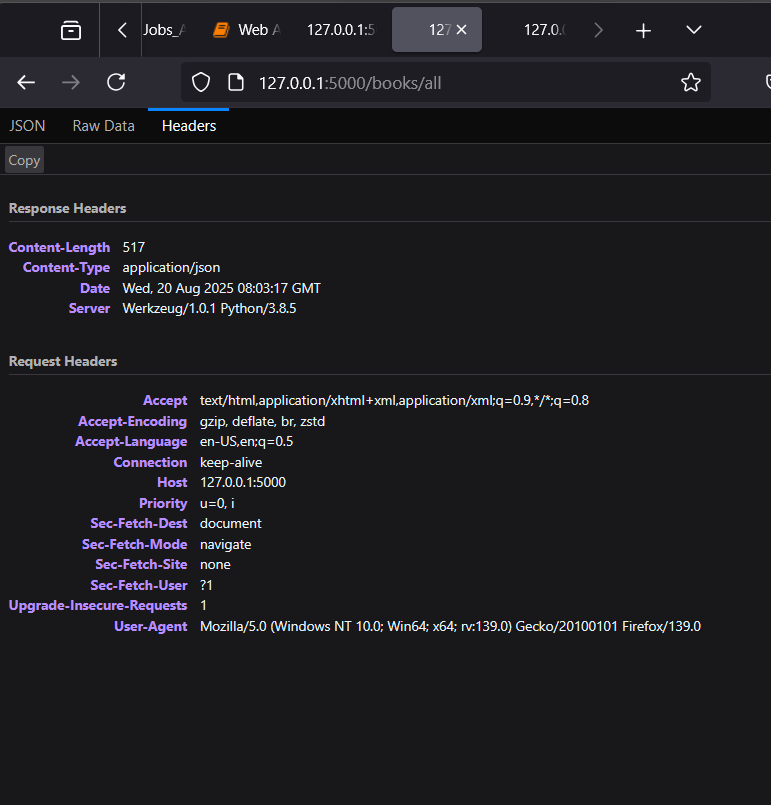
One book (id=0): http://127.0.0.1:5000/books?id=0
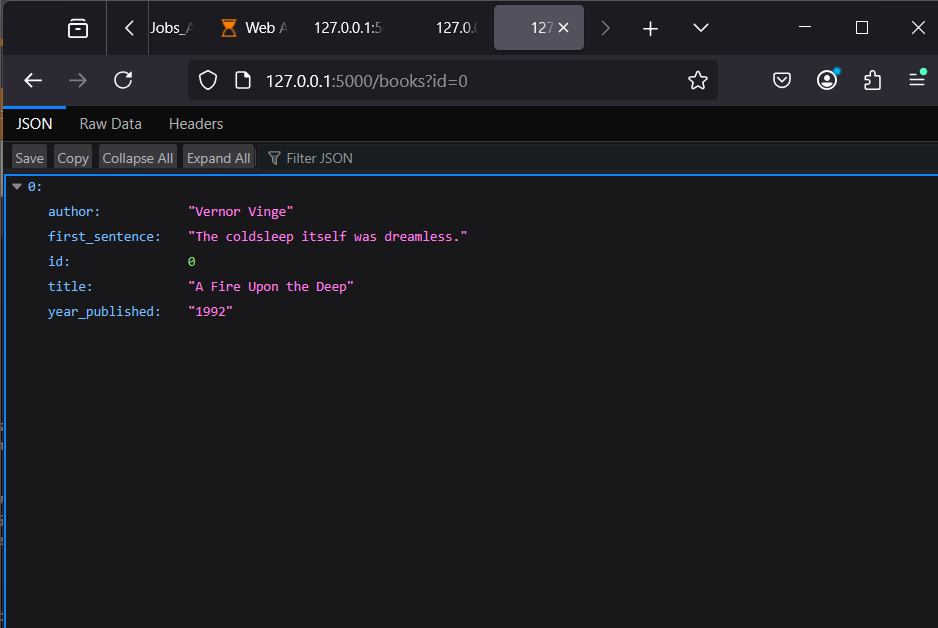

Voilaa!! We have successfully built a Web API using Flask